<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Luis Picón.
- Nombre de alumno 2: Israel Astudillo M.


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/IsraPKMNPAP/Laboratorio-de-Herramientas)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

In [6]:
!pip install xgboost

In [7]:
# Inserte su código aquí

In [8]:
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(df.shape)

(70692, 18)


In [10]:
# Función que recibe un dataframe de datos y columnas a revisar del dataframe
# y devuelve los índices de los elementos
# que son considerados outliers por columna, según el criterio intercuartílico.
def find_outliers(df, cols):
    outliers = []
    for col in cols:
      q1 = df[col].quantile(0.25)
      q3 = df[col].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      outliers.extend([(index, col) for index in df[(df[col] < lower_bound) | (df[col] > upper_bound)].index])
      outliers_df = pd.DataFrame(outliers, columns=['index', 'column'])
    return outliers_df


In [11]:
# Exploración de los datos

# Preservamos una copia
df_copy = df.copy()

# Análisis de nulos
#print(df_copy.isnull().sum())
#  Tratamiento de nulos
#  No hay nulos

# Tipos de variables
#print(df.dtypes)
#  Separación en variables numéricas y categóricas
#  Vemos que todas las variables son float64, incluyendo las binarias que podemos ver del head.
#  En ese sentido las variables categóricas ya están en un formato aceptable.
#  Sin embargo, puede ser útil separar las variables en binarias, las de rango acotado y de rango no acotado.
#  Aún no sabemos bien cómo se comporta cada una.

# Estadísticos principales de variables (max, min, media, varianza, mediana y cuartiles)
#print("Los máximos por variable son:\n",df.max())
#print("Los mínimos por variable son:\n",df.min())
#  Vemos que las variables ["Sex", "HighChol", "CholCheck", "Smoker","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","DiffWalk","Stroke","HighBP"]
#print("Las medias por variable son:\n",df.mean())
#print("Las desviaciones estándar por variable son:\n",df.std())
#print("El cuantil 25 por variable es:\n",df.quantile(0.25))
#print("Las medianas por variable son:\n",df.median())
#print("El cuantil 75 por variable es:\n",df.quantile(0.75))
#  Asiganmos las variables a sus listas
bin = ["Sex", "HighChol", "CholCheck", "Smoker","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","DiffWalk","Stroke","HighBP"]
num = ["Age","BMI","GenHlth","PhysHlth"]

# Rangos de variables
# Del análisis anterior vemos que solo hay 4 variables en las cuales tiene sentido hacer escalado o examinar su rango.
#for i in range(len(num)):
#  print("El máximo de la variable",num[i],"es:",df[num[i]].max())
#  print("El mínimo de la variable",num[i],"es:",df[num[i]].min())
#  print("El rango de la variable",num[i],"es:",df[num[i]].max()-df[num[i]].min())
# Observamos que la variable GenHlth parece categórica de valores 1 al 5. Lo verificaremos con los histogramas mas adelante.
# Esto nos indica que podemos conservar la variable de esta forma, dado que parece indicar que 5 es mayor que 1 y ser categórica ordinal.
#  Escalados
#  Por ahora, tiene sentido aplicar escalado sobre las varibles numéricas dado que tienen rangos distintos. En principio, recomendaría utilizar MinMaxScaler
#  dado que limita el rango de las variables entre 0 y 1 similar al resto de aabundantes variables categóricas, no impone distribuciones sobre las variables
#  como standard scaler. Sin embargo, este es sensible a outliers. Hagamos un breve análisis de outliers.

# Análisis de Outliers
out = find_outliers(df,num)
print("Outliers totales sin repetición de fila:")
print(len(out.groupby('index').count()))
print("Ouliers por columna:")
print(out.groupby('column').count())

# Encontramos outliers en la columna BMI y PhysHlth. Referenciando el máximo de BMI, este alcanzaba los 80 mientras que los rangos normales del IMC
# (mismo indicador pero en inglés) rodean los 20 y se considera sobrepeso mayor a 30. Sin embargo, quizás es posible que personas tengn un BMI tan alto
# y quizás esas mismas personas son muy propensas a la diabetes. Sin embargo este tipo de varianza quizá puede obstaculizar el aprendizaje del modelo.
# Por otro lado PhysHlth no es un indicador bien conocido del que tengamos conocimiento a priori, sin emabrgo llama la atención que tenga escala diferente
# a la otra variable Hlth y que específicamente su valor máximo sea 30. Son una gran cantidad de datos también, y una decisión informada es crucial.
# A continuación revisamos los boxplots e histogramas.

Outliers totales sin repetición de fila:
12057
Ouliers por columna:
          index
column         
BMI        2181
PhysHlth  10624


In [12]:
# Distribuciones.
#  Histogramas y boxplots
import seaborn as sns
import matplotlib.pyplot as plt

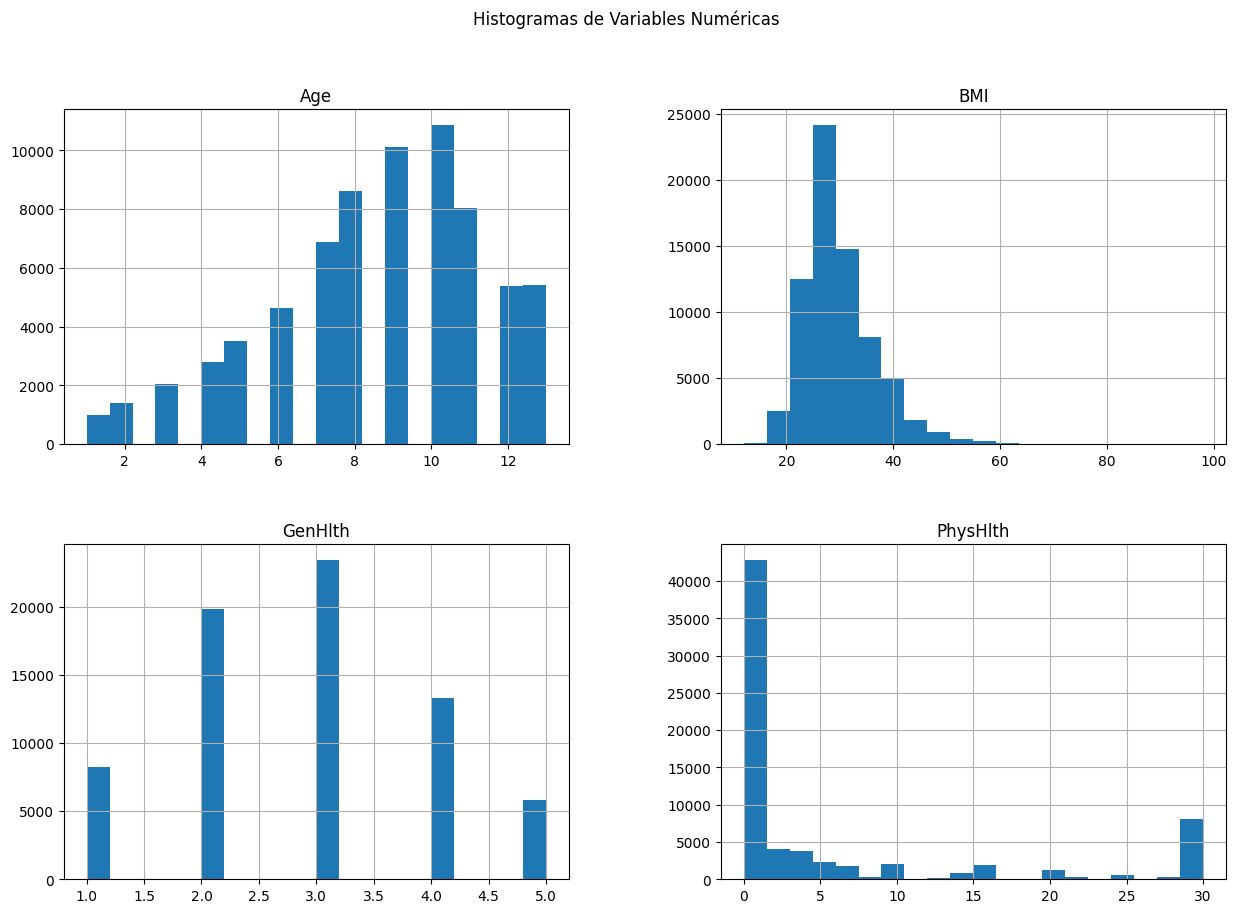

In [13]:
# Histogramas
df[num].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogramas de Variables Numéricas")
plt.show()

Primero, concluimos que la variable GenHlth es efectivamente categórica ordinal semejante a una calificación donde 5 es mejor e 1 peor, según la interpretación del histograma y lo que se asume al respecto.
Por otro lado, PhysHlth tiene un comportamiento especialmente extraño concentrado en el 0. Fuera de eso, el segundo mayor valor ocurre en el máximo. La distribución de la variable no es clara.

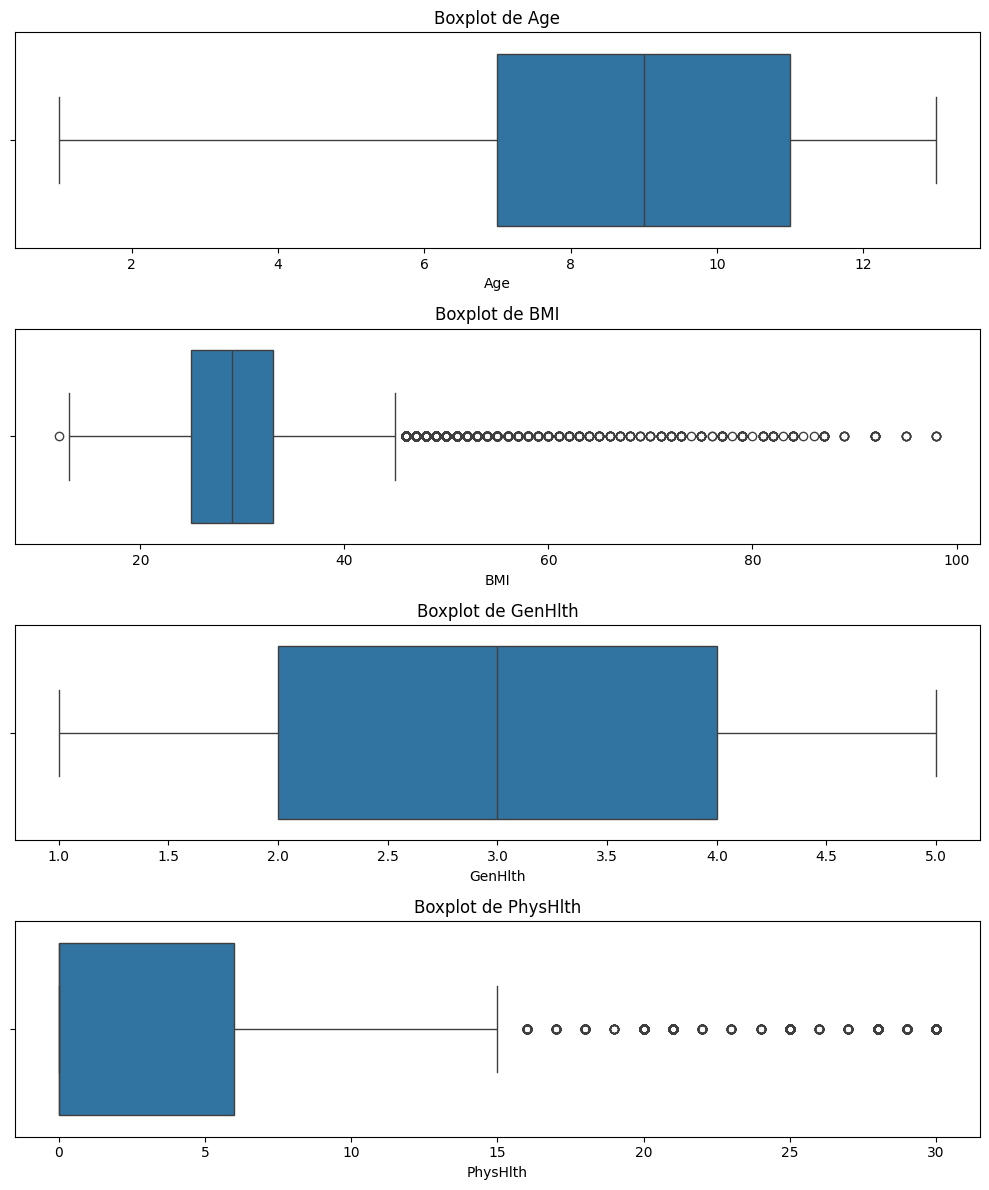

In [14]:
# Boxplots
fig, axes = plt.subplots(nrows=len(num), ncols=1, figsize=(10, len(num) * 3))

# Crear un boxplot para cada variable numérica
for i, col in enumerate(num):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

Del boxplot vemos nuevamente los outliers antes encontrados, con un lambda ligeramente más estricto. Cabe destacar el patrón equidistante de los outliers, que da indicios de ser algún tipo de métrica ordinal discreta.

Finalmente, decidimos eliminar los outliers encontrados. Esto se realizará en el ColumnTransformer siguiente. Por otro lado, debido a la abundante presencia de outliers, se decidió trabajar con RobustScaler a pesar de que se eliminen outliers. Se considera que este puede dar los mejores resultdos en este contexto.

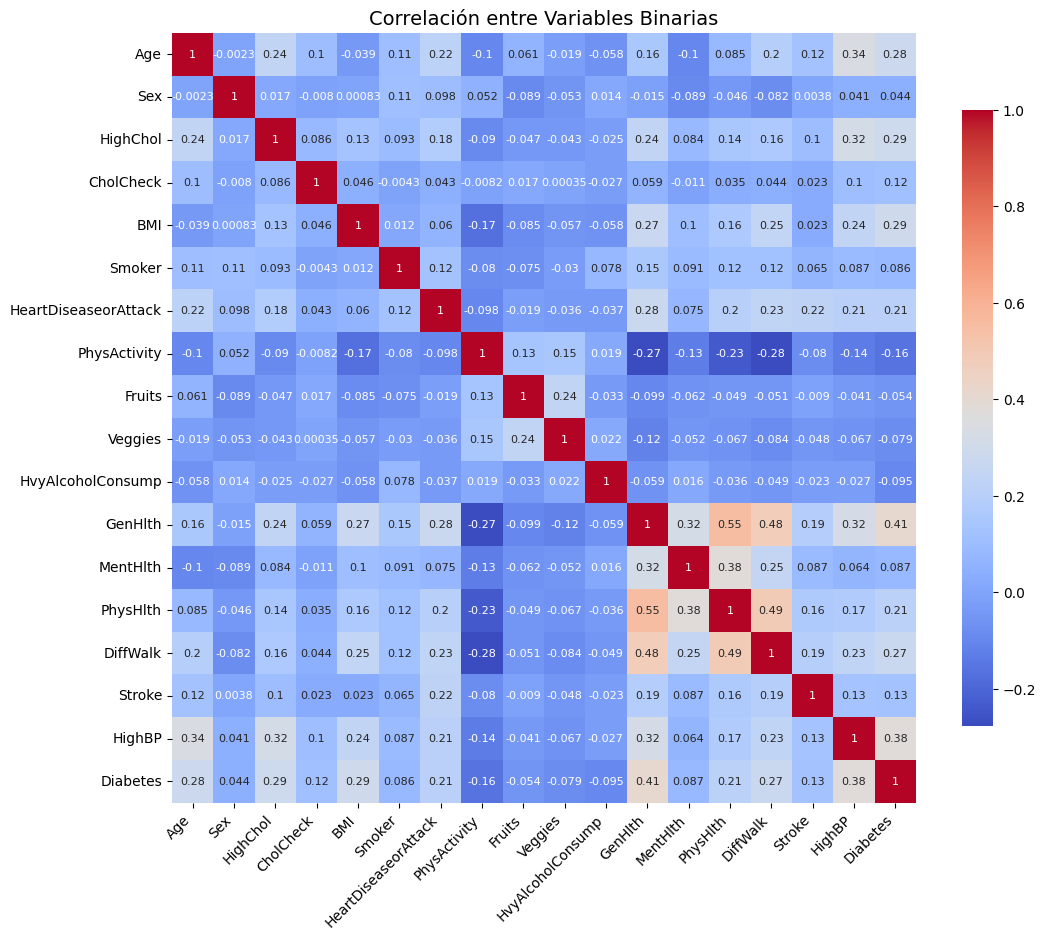

In [15]:
# Correlación entre las variables binarias
# Evaluamos correlación entre variables
corr = df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.8}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title("Correlación entre Variables Binarias", fontsize=14)
plt.show()

Notamos que las variables binarias tienen poca correlación con el resto de variables en general. Por otro lado las correlaciones mas relevante son, GenHlth con GenHlth, y DiffWalk con GenHlth y GenHlth.

In [16]:
# Conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Resetear los índices
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import FunctionTransformer

In [19]:
# Función a utilizar en funciton transformer para filtrar las columnas
num = ["Age","BMI","GenHlth","PhysHlth"]
def filter_outliers(df):
    for column in num:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataframe = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return dataframe

In [20]:
# Instanciamos las transformaciones
num_transformer = RobustScaler()
fun_transformer = FunctionTransformer(filter_outliers)

# ColumnTransfomer scaler
scaler = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num)
    ],
    verbose_feature_names_out=False,
    remainder='passthrough',
    force_int_remainder_cols=False
).set_output(transform='pandas')

# Pipeline
preprocesing = Pipeline(steps=[('outliers', fun_transformer),('scaler', scaler)])

In [22]:
filtered_train = preprocesing.fit_transform(X_train)
filtered_test = preprocesing.fit_transform(X_test)

In [24]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
# Pipeline
pipeline = Pipeline(steps=[('preprocesing', preprocesing), ('xgb', xgb)])

In [26]:
# Guardamos copias
original_y_train = y_train.copy()
original_y_test = y_test.copy()


In [27]:
# Hacemos coincidir los elementos aún presentes en train y test con sus respectivas etiquetas con un join, posterior al filtrado de outliers
y_train = filtered_train.join(y_train)["Diabetes"]
y_test = filtered_test.join(y_test)["Diabetes"]

In [29]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocesing',
                 Pipeline(steps=[('outliers',
                                  FunctionTransformer(func=<function filter_outliers at 0x7a8555ba1e10>)),
                                 ('scaler',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('num',
                                                                   RobustScaler(),
                                                                   ['Age',
                                                                    'BMI',
                                                                    'GenHlth',
                                                                    'PhysHlth'])],
                                                    verbose_feature_names_out=False))])),
                ('xgb',
                 XGBClassifier(base_sc...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [30]:
# Predecimos
y_predicted = pipeline.predict(X_test)

In [31]:
# Clasification Report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.77      0.74      0.76     10625
         1.0       0.71      0.75      0.73      9115

    accuracy                           0.75     19740
   macro avg       0.74      0.75      0.74     19740
weighted avg       0.75      0.75      0.75     19740



Vemos métricas bastante sólidas que dan luces de que si se está aproximando correctamente en una cantidad de casos sustancial correctamente la etiqueta, sin desbalance importante de clases y un comportamiento en general bueno, sin embargo mejorable.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

In [32]:
# Inserte su código aquí

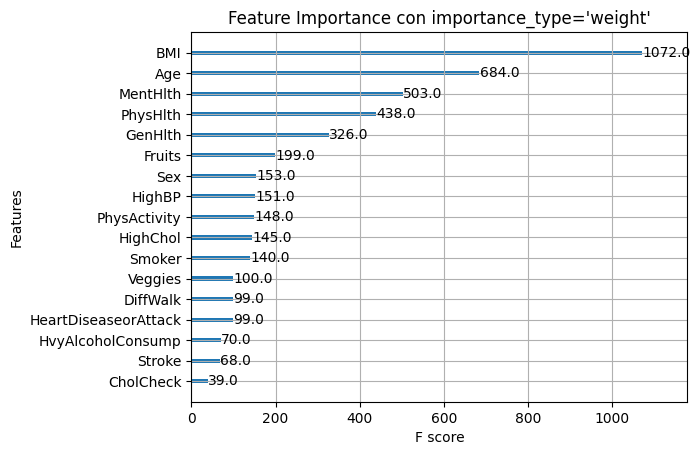

In [33]:
# Importancia de Features
# Accedemos a XGBoost entrenado en el Pipeline
xgb_trained = pipeline.named_steps['xgb']
# Hacemos plot_importance

import xgboost as XGB
import matplotlib.pyplot as plt

# weight: número de veces que una feature es usada para dividir la data
XGB.plot_importance(xgb, max_num_features=20, importance_type='weight')
plt.title("Feature Importance con importance_type='weight'")
plt.show()

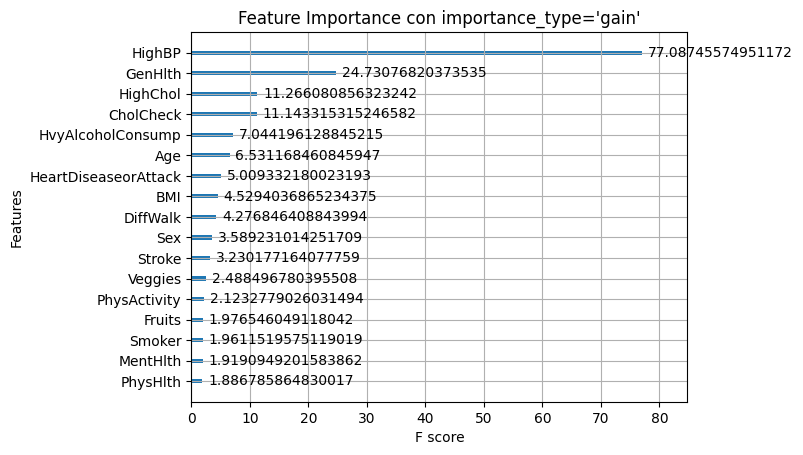

In [34]:
# gain: Mejora promedio de ganancia de precisión, o información ganada que aporta cada característica
# medido en la fracción de los datos que se explican correctamente con la característica en su respectivo nodo.
XGB.plot_importance(xgb, max_num_features=20, importance_type='gain')
plt.title("Feature Importance con importance_type='gain'")
plt.show()

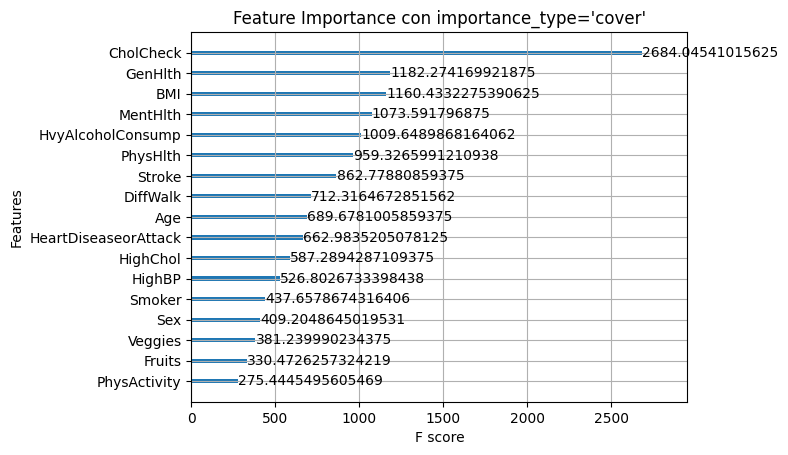

In [35]:
# cover: representa la covertura promedio de cada característica en cada nodo de decisión, es decir el procentaje
# total de la data que es explicado por la característica en su nodo.
XGB.plot_importance(xgb, max_num_features=20, importance_type='cover')
plt.title("Feature Importance con importance_type='cover'")
plt.show()

Los resultados obtenidos no son compatibles entre sí, dado que según las distintas importancias obtenemos resultados distintos. El que más llama la atención puede ser CholCheck que tiene poca importancia por el criterio de número de divisiones, pero alta para cover y entre las más altas para gain. Por otro lado, BMI es la más importante en número de divisiones, aporta similar al resto de variables medido en gain y en cover también es una de las más relevantes.
La desigualdad entre estos resultados se debe a los distintos roles en la explicabilidad de las variables en el árbol de decisión, como se mencionó BMI es una variable muy útil divisivamente pero no tanto explicativamente en el sentido de que aporta a la construcción de reglas que sean más precisas.
Por otro lado, una variable puede no ser útil para las divisiones del árbol, pero si generar reglas con un cover alto que abarquen grandes porciones de la data como CholCheck. Esto también tiene sentido, dado que se espera que una variable que divide pocas veces la data en el árbol esté en una rama superior y permita diferenciar entre sí mayores cantidades de datos, como un criterio más general de separación de grupos.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [36]:
# Inserte su código aquí

In [37]:
# Modelo de permutación

# Paquetes
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Features
features = xgb_trained.get_booster().feature_names

# Compatibilizamos el orden de las columnas al de features
filtered_test = filtered_test[features]

# Modelo de permutación
result = permutation_importance(xgb_trained, filtered_test, y_test, n_repeats=30, random_state=42, n_jobs=2)

In [38]:
# Veamos las desviaciones estándar
for feature, std in zip(features, result.importances_std):
    print(f"{feature}: {std}")


Age: 0.001774579999247857
BMI: 0.001868318295463792
GenHlth: 0.0018408856187442561
PhysHlth: 0.000796886704051221
Sex: 0.000854689651785269
HighChol: 0.001435255377014543
CholCheck: 0.0005866971994330346
Smoker: 0.0008022982728985523
HeartDiseaseorAttack: 0.0009438895250370287
PhysActivity: 0.0007396072843062377
Fruits: 0.0005989337990768132
Veggies: 0.0007482715177382258
HvyAlcoholConsump: 0.0006344444095590744
MentHlth: 0.0010353367348386675
DiffWalk: 0.0008135497873172043
Stroke: 0.0005161209980526854
HighBP: 0.0012547027903521124


Estos valores indican que las importancias en las 30 repeticiones realizadas por cada columna, tienen una variación o desviación estándar pequeña en general. Es decir, realizar las permutaciones de filas por cada columna no parece introducir variabilidad sustancial a los resultados obtenidos con el modelo.

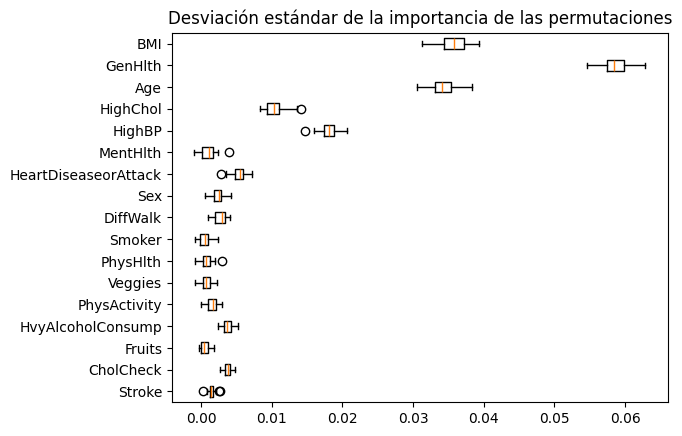

In [39]:
# Graficamos la desv estándar
sorted = result.importances_std.argsort()
plt.boxplot(result.importances[sorted].T,
            vert=False,
            labels=np.array(features)[sorted])
plt.title("Desviación estándar de la importancia de las permutaciones")
plt.show()

Text(0.5, 1.0, 'Media de la importancia de las permutaciones')

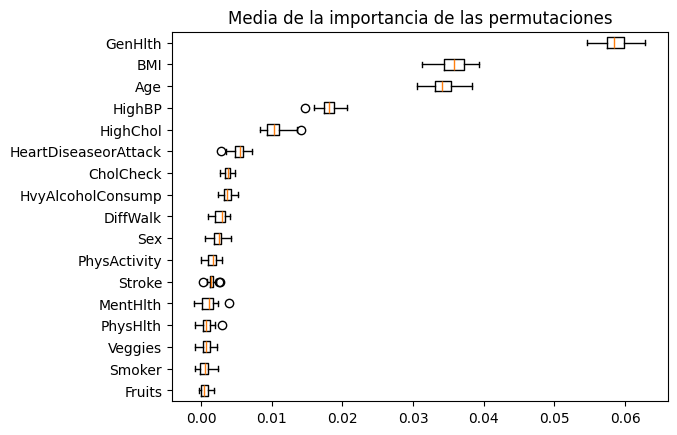

In [40]:
# Graficamos ahora para la media
sorted = result.importances_mean.argsort()
plt.boxplot(result.importances[sorted].T,
            vert=False,
            labels=np.array(features)[sorted])
plt.title("Media de la importancia de las permutaciones")

Esta propuesta mide la importancia de las features a través del error que induce realizar permutaciones de filas para cada columna. De los resultados se ve que la magnitud del error inducido por cada iteración o permutación distinta es en promedio bastante bajo y de poca variacioón tambiém, indicando robustez del modelo frente a este tipo de permutacciones.

Las features de mayor impacto son las que inducen un mayor error, para esto nos podemos fijar en el error promedio inducido y su desviación.

Las 5 más importantes según este criterio son GenHlth, BMI, Age, HighBP y HighChol, que también son las que tienen las mayores desviaciones pero no en ese orden.
Estas variables si hacen sentido con el conocimiento general de salud en relación a la diabetes, como el IMC, la edad y alto pulso cardíaco. Estas variables también aparecieron en análisis anteriores, como HighChol y GenHlth lo cual nos indica su importancia en distintos criterios y nos guía a una conclusión.

En general los resultados obtenidos anteriormente si se repiten, pero no todos ni bajo los mismos criterios. Ocurre que algunas variables son de las más relevantes para distintos criterios y esto puede indicar consistencia en la interpretación que se entrega, como ya se mencionó.

Ventajas de este método son que utiliza un método ya entrenado una vez, lo cual reduce su costo computacional, es sencillo de entender e interpretar y considera el modelo como un todo, teniendo en cuentas las relaciones entre variables que puedan existir.

Desventajas de esta aproximación son su enlace al error del modelo, es decir si tenemos un error alto o un modelo con menores capacidad predictiva el método puede verse limitado. Features muy correlacionadas pueden sesgar los efectos que observamos, dado que se permuta una columna a la vez. Es decir, estas pueden encapsular los efectos de la otra cuando se revisa cad auna y viceversa. De la misma forma anterior, esta aproximación necesita acceso a las etiquetas reales de la data y no opera en su ausencia.




## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [41]:
!pip install shap

In [42]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [43]:
# Inserte código para calcular shapley values aquí
import shap

explainer = shap.TreeExplainer(xgb)

shap_values = explainer(X)


In [44]:
shap_values

.values =
array([[ 0.6497112 ,  0.10764998,  0.19903879, ...,  0.00488237,
         0.00160744,  0.4609191 ],
       [ 0.43892577,  0.41021842,  0.8588154 , ...,  0.06560582,
         0.03826786,  0.43132386],
       [ 1.2367715 ,  0.68298113,  0.47247782, ..., -0.03891753,
         0.01979319, -0.47970608],
       ...,
       [ 0.3471042 , -0.12229142,  0.67505705, ...,  0.14224587,
        -0.01610607,  0.32208446],
       [ 0.73397714,  0.06797498,  0.8705326 , ..., -0.05992953,
        -0.01667996,  0.418431  ],
       [ 0.39859247, -0.05332574,  0.71316016, ..., -0.03664484,
        -0.02136753,  0.34680808]], dtype=float32)

.base_values =
array([-0.20955828, -0.20955828, -0.20955828, ..., -0.20955828,
       -0.20955828, -0.20955828], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  1., ...,  1.,  0.,  1.],
       [11.,  0.,  1., ...,  1.,  0.

Cada número en este resultado indica la contribución de cada característica en la predicción de un paciente específico (esto para cada paciente). Es decir, indica cuánto incrementa o disminuye la probabilidad de que el paciente sea clasificado como positivo para diabetes debido a esa característica

La positividad o negatividad del SHAP value (valores que salen del resultado) tiene un significado; si este valor es positivo, significa que dicha característica está aumentando la probabilidad de que el modelo prediga que dicho paciente tiene diabetes, mientras que si este valor es negativo estaría indicando que la característica está teniendo el efecto contrario en la predicción del paciente


### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

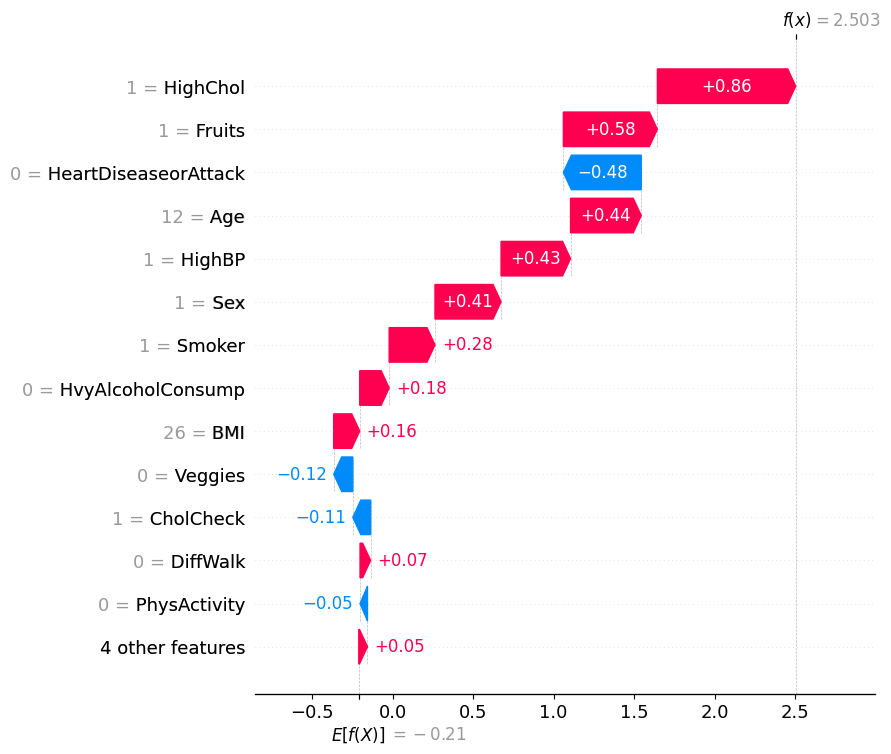

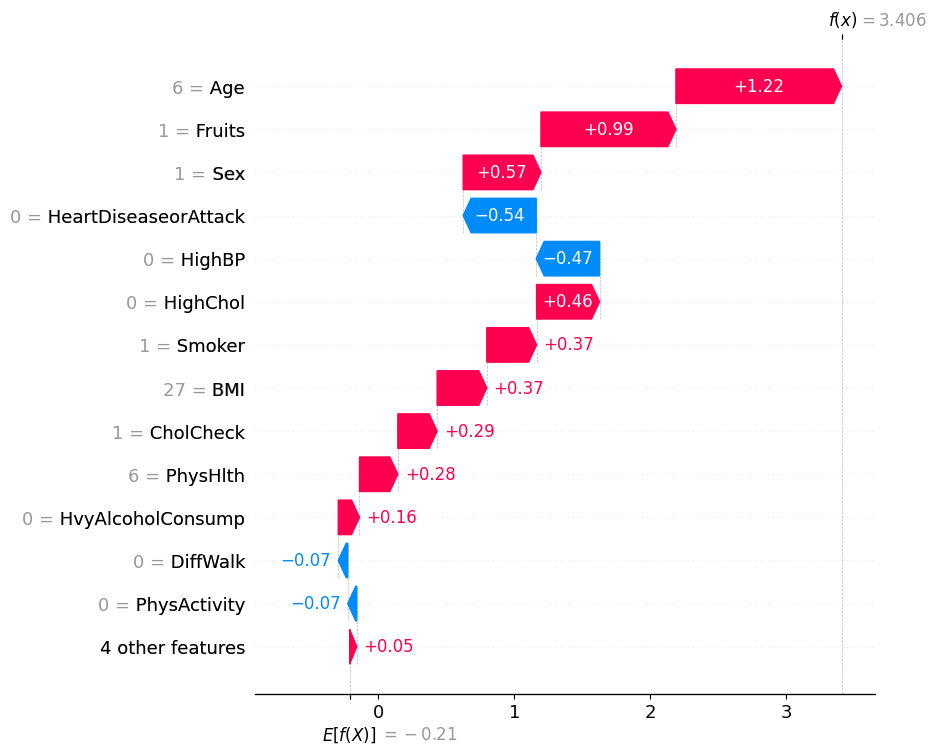

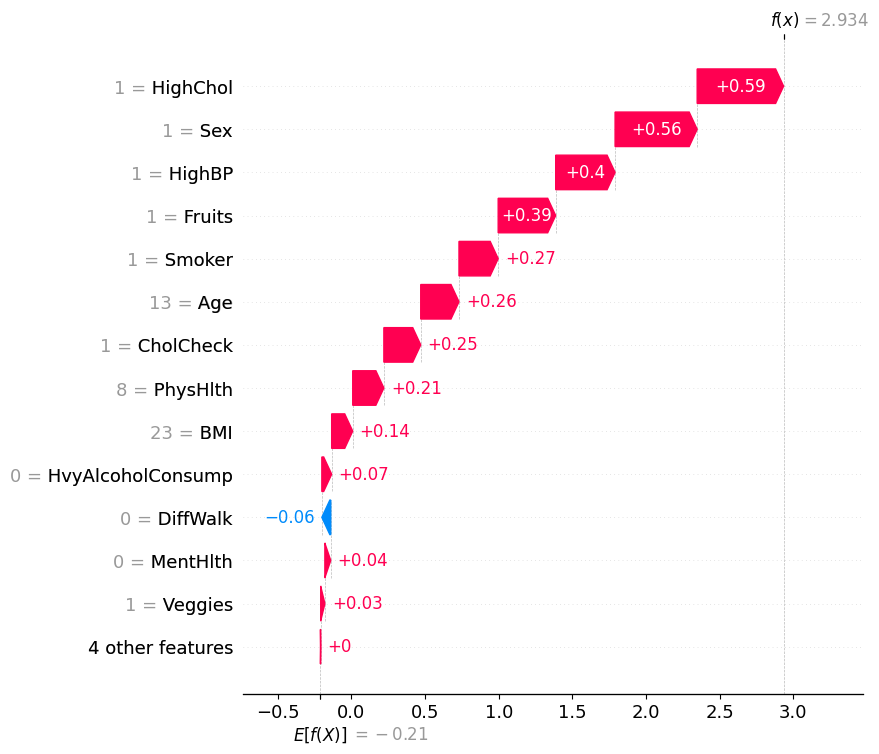

In [45]:
# Inserte código para generar gráficos de aporte local aquí
# Aporte local para la instancia 1
idx=1
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

# Aporte local para la instancia 9
idx=9
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

# Aporte local para la instancia 150
idx=150
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

Las variables que más parecen afectar de manera positiva a la probabilidad de tener diabetes son:"Age", "HighChol", "Fruits", "HighBP", "Sex", "Smoker", "BMI", "PhysHlth" y "HvyAlcoholConsump" (está ultima, entre otras, en una menor medida para estos registros).

Por otro lado, aquellas variables que más parecen afectar de manera negativa a la probabilidad de tener diabetes son: "HeartDiseaseorAttack", "HighBP", "Veggies" y "PhysActivity" junto con "DiffWalk" en una menor medida.


Podemos observar de las gráficas, que varias de las variables que mencionamos anteriormente poseen un efecto similar en la probabilidad de tener diabetes entre los tres registros (salvo por algunas como "CholCheck" que tiene un efecto distinto en dos registros diferentes).Es por esto que podríamos seleccionar variables como por ejemplo "Sex", "Fruits" y "HighCol" como factores de riesgo importantes para el modelo (aumentan notablemente la probabilidad de que un paciente tenga diabetes).

Por otro lado también tenemos aquellas variables que disminuyen la probabilidad de que un paciente tenga diabetes, entre las cuales destacamos "DiffWalk" que aparecen en los tres registros en una menor magnitud y "HeartDiseaseorAtack" que aparece como una variable relevante en dos de las tres instacias como una característica que reduce la probabilidad de predicción de un paciente con dibetes.


Por el momento solo estamos considerando interpretaciones locales, es decir, específicas para cada instancia, por lo que con sólo el análisis de 3 instancias no sería recomendado generalizar este análisis a todo el dataset. Sin embargo, si es que logramos encontrar que las variables que se repetían en las tres instancias anteriores, tienen el mismo efecto en una cantidad de instancias considerable, se podría llegar a generalizar el efecto de estas variables a un nivel global.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

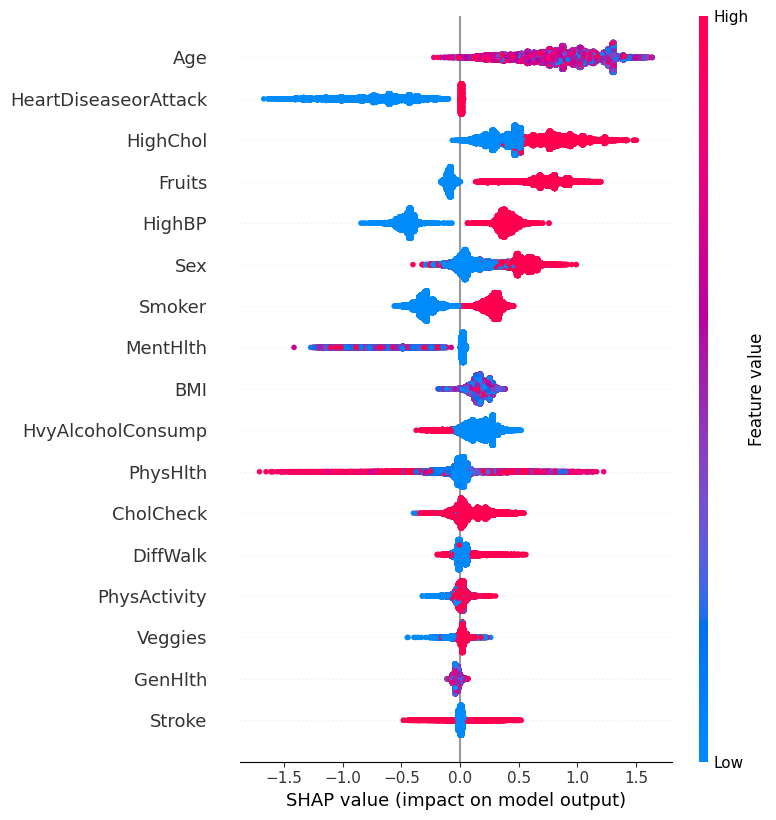

In [46]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, X)

Del resumen observado a nivel global, podemos ver que aquellas variables como "Sex", "Fruits" y "HighCol" que habíamos propuesto como candidatas a aumentar la pobabilidad de tener diabetes en la parte anterior, efectivamente muestran el mismo efecto a nivel global. Por otro lado, vemos también que la variable "DiffWalk", tiene el efecto contrario a nivel global, con respecto a lo que observamos a nivel local, mostrando una tendencia mayor a aumentar la probabilidad de que un paciete sea diagnosticado con diabetes.
También podemos observar que la variable "Age" también tiene una fuerte tendencia positiva en la probabilidad de que un paciente tenga diabetes, aunque vemos también que no necesariamente existe una correlación positiva entre esta variable y la variable objetivo, ya que se puede observar también que rangos de edad bajos también están asociados a shap values positivos y de gran magnitud.
"HeartDiseaseorAtack" es sin duda la variable que más afecta negativamente a la probabilidad de que un paciente tenga diabetes.
Por último, también podemos notar que existen variables que, en general afectan de la misma forma a la probabilidad de que un paciente tenga diabetes y a la probabilidad de que no la tenga.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [47]:
# Inserte código para generar gráficos de feature vs shap value aquí
feature_names = pipeline.named_steps['preprocesing'].named_steps['scaler'].get_feature_names_out()


# Obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = feature_names[shap_values_abs.argsort()[::-1]]

feature_importance_names[:20]

array(['Age', 'CholCheck', 'GenHlth', 'HeartDiseaseorAttack', 'HighBP',
       'BMI', 'HighChol', 'HvyAlcoholConsump', 'Sex', 'Fruits',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Smoker', 'PhysActivity',
       'Veggies', 'Stroke'], dtype=object)

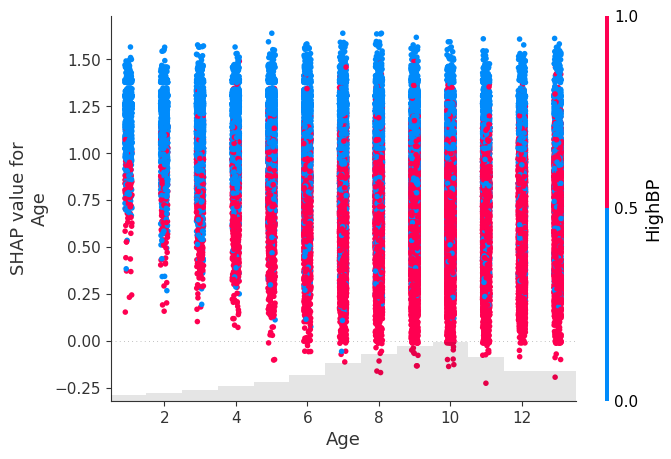

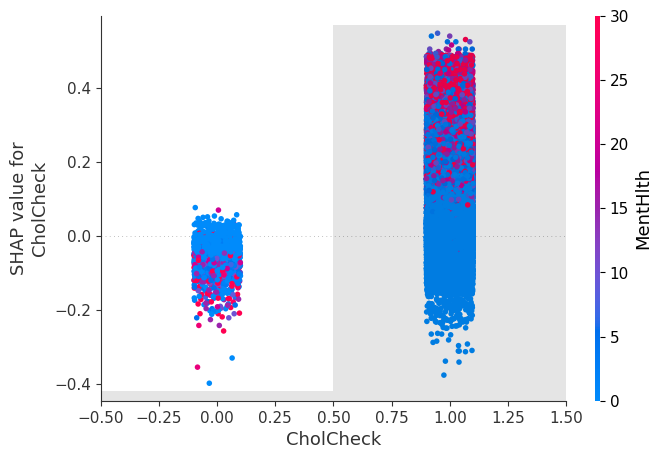

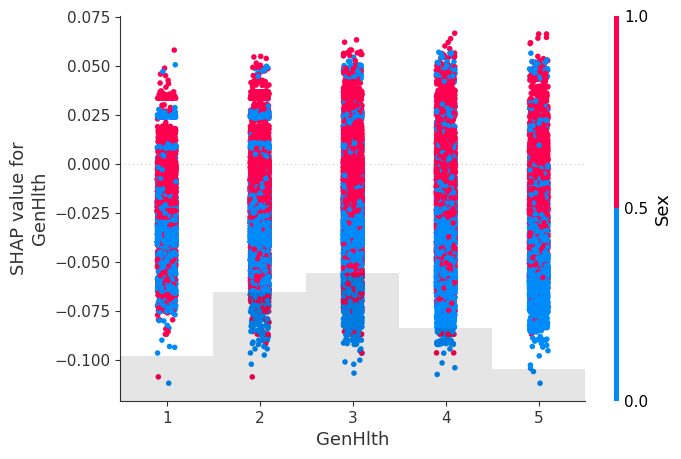

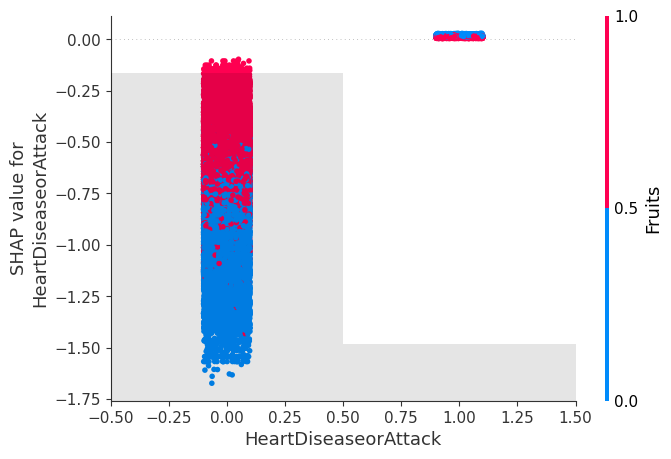

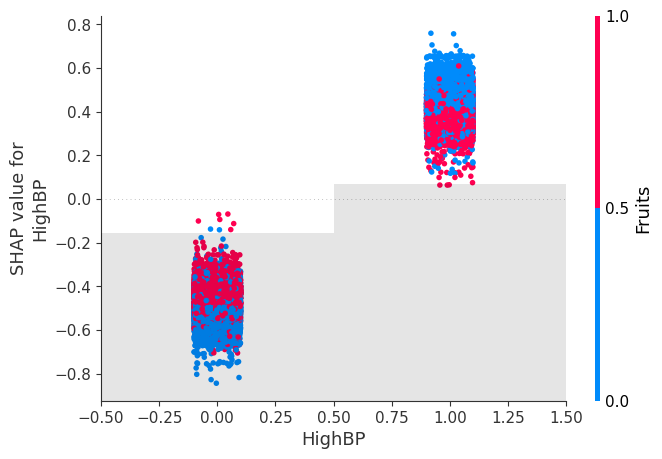

In [48]:
for name in feature_importance_names[:5]:
    shap.plots.scatter(shap_values[:,name],
                       color = shap_values)

De la primera gráfica podemos notar que, a medida que los valores de "Age" y "HeartDiseaseorAtack" aumentan, los shap values van tendiendo a tener valores negativos. Esto nos indica que estas dos variables están correlacionadas positivamente y que al combinar sus efectos, vemos que influyen de manera levemente negativa en la probabilidad de un paciente de tener diabetes.

De la segunda gráfica podemos saber que, para aquellos pacientes que no registran un "HeartDiseaseorAtack", el consumo de frutas aumenta la probabiilidad de tener diabetes, pero no llega a tener un impacto positivo sobre los shap values de la variable "HeartDiseaseorAtack" (sólamente tiende cada vez más a 0).Sin embargo, si análizamos este mismo caso pero observando los shapvalues para la variable "Fruits" observamos el mismo efecto, pero esta vez, si se llegan a observar impactos positivos en la probabilidad de un paciente de tener diabetes.

Con respecto al tercer gráfico podemos notar que "HighChol" y "HighBP" tienen efectos contrarios en la probabilidad de tener diabetes, vemos que pacientes que tienen "HighChol" aumentan sus probabilidades de tener diabetes y además,si combinamos este efecto con valores bajos de "HighBP" (0, es decir el paciente no tiene presión sanguínea alta), notamos que la probabilidad de tener diabetes aumenta.

Por último, podemos observar efectos contrarios en la probabilidad de tener diabetes, al analizar los efectos combinados de las variables "HighBP" y "Fruits". De la última gráfica podemos observar que aquellos pacientes que no presentan "HighBP" hacen menos negativa su probabilidad de tener diabetes al consumir frutas, mientras que aquellos pacientes que si presentan esta primera variable, aumentan la probabilidad de tener diabetes significativamente al no comer frutas.


### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

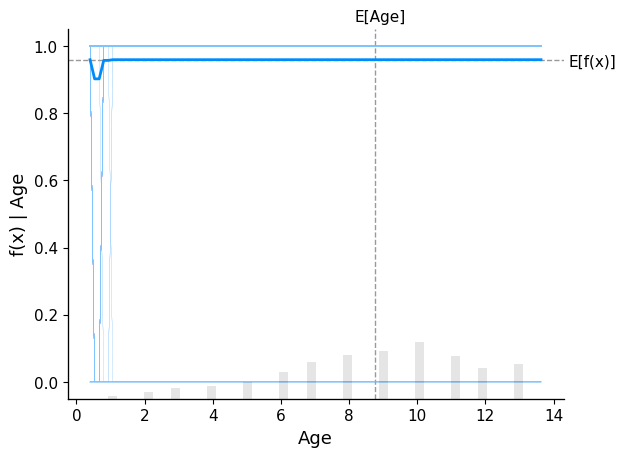

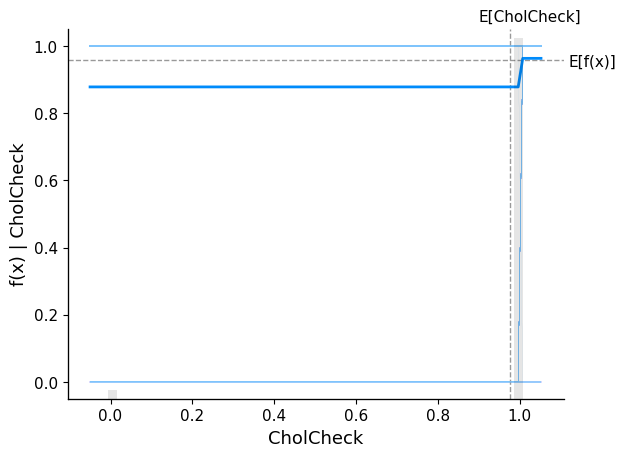

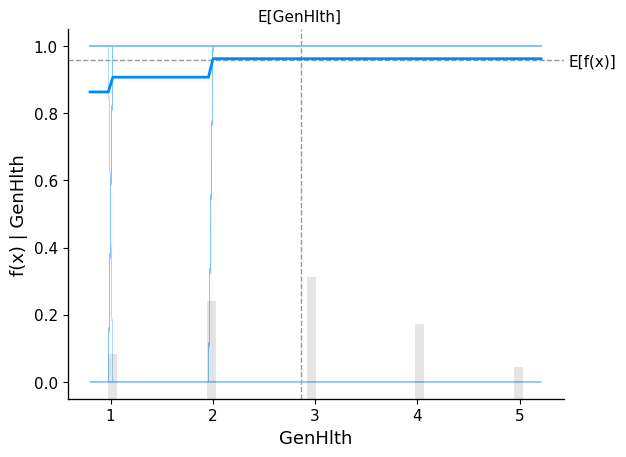

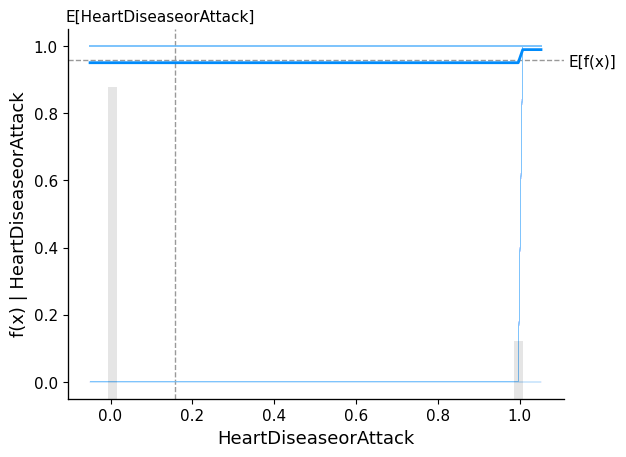

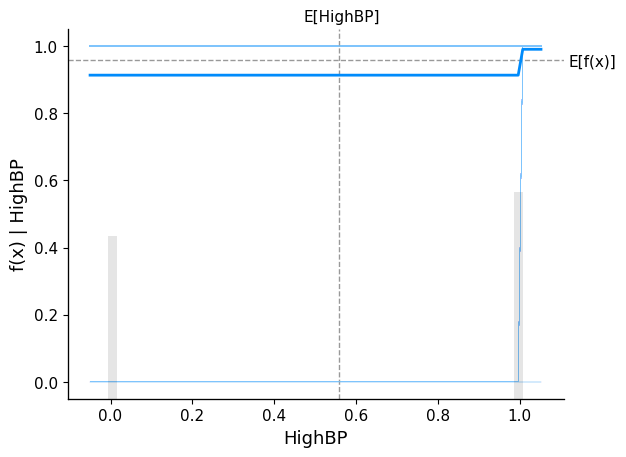

In [49]:
# Obtenemos los nombres de las características del modelo xgb entrenado
model_feature_names = xgb.get_booster().feature_names

X1000 = shap.utils.sample(X, 1000)
# Reordenamos las columnas de X1000 para que calce con el orden de características producido por el modelo
X1000 = X1000[model_feature_names]

sample_ind = 20

# Graficamos PDP para las variable más importantes
for var in feature_importance_names[:5]:
    shap.partial_dependence_plot(
        var,
        xgb.predict,
        X1000,
        model_expected_value=True,
        feature_expected_value=True,
        ice=True
    )


A partir de las gráfica podemos obtener conclusiones con respecto a las variables y a su efecto en la salida del modelo similares a las ya descritas anteriormente, por ejemplo, vemos que cuando el paciente registra las variables "CholCheck", "HeartDiseaseorAtack" y "HighBP", la esperanza de la probabilidad de salida aumenta debido a esta variables, es decir, en promedio, afectan positivamente a la probabilidad de tener diabetes. Lo mismo pasa con la variable "GenHlth", donde notamos que, a medida que los valores de esta variable aumentan, también lo hace la probabilidad (en promedio) de tener diabetes.

Con respecto a la variable "Age", notamos que para valores más bajos, la esperanza de la probabilidad de la salida del modelo disminuye, sin embargo, a medida que aumentan los valores para "Age", esta esperanza aumenta rápidamente y se mantiene constante.

Por último, con respecto a la generalización de estos resultados, podemos decir que las conclusiones obtenidas a partir de esta submuestra de 1000 observaciones pueden proporcionar una buena aproximación de las relaciones en el conjunto de datos completo, pero solamente si esta muestra es representativa de todos los datos del conjunto.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [55]:
!pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
      Successfully uninstalled scikit-image-0.24.0


In [56]:
from alibi.explainers import AnchorTabular

In [58]:
# Extraemos solo el paso de preprocesamiento del pipeline
X_train_preprocessed = preprocesing.fit_transform(X_train)
X_test_preprocessed = preprocesing.transform(X_test)

# Convertimos los resultados a DataFrames para un análisis más claro y fácil
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=X_train.columns)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=X_test.columns)

# Entrenamos el modelo usando los datos preprocesados
xgb.fit(X_train_preprocessed, y_train)

explainer = AnchorTabular(predictor = xgb.predict, feature_names=X_train_preprocessed.columns.tolist())
explainer.fit(X_train_preprocessed.values)

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': None, 'disc_perc': (25, 50, 75)},
  'version': '0.9.6'}
)

In [59]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000
explanation = explainer.explain(X_test_preprocessed.values[idx])
print(f"Explicación para observación {idx}:")
print("Reglas de Ancla:", explanation.anchor)
print("Precisión de la Regla:", explanation.precision)
print("Cobertura de la Regla:", explanation.coverage, "\n")

idx = 3001
# explicar predicción idx 3001
explanation = explainer.explain(X_test_preprocessed.values[idx])
print(f"Explicación para observación {idx}:")
print("Reglas de Ancla:", explanation.anchor)
print("Precisión de la Regla:", explanation.precision)
print("Cobertura de la Regla:", explanation.coverage, "\n")

idx = 5751
# explicar predicción idx 5751
explanation = explainer.explain(X_test_preprocessed.values[idx])
print(f"Explicación para observación {idx}:")
print("Reglas de Ancla:", explanation.anchor)
print("Precisión de la Regla:", explanation.precision)
print("Cobertura de la Regla:", explanation.coverage, "\n")



# Evaluamos la precisión en el conjunto de datos completo
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo en el conjunto total de datos:", accuracy)

Explicación para observación 1000:
Reglas de Ancla: ['BMI > 0.62', 'DiffWalk > 0.00', 'HighBP > 0.00']
Precisión de la Regla: 0.9844961240310077
Cobertura de la Regla: 0.048 

Explicación para observación 3001:
Reglas de Ancla: ['Age > 0.50', 'BMI > 0.00', 'Sex > 0.00', 'Smoker > 0.00']
Precisión de la Regla: 0.9587813620071685
Cobertura de la Regla: 0.0156 

Explicación para observación 5751:
Reglas de Ancla: ['GenHlth > -1.00', 'HighBP > 0.00', 'BMI > 0.00', 'Age > 0.00']
Precisión de la Regla: 0.9951690821256038
Cobertura de la Regla: 0.1061 

Precisión del modelo en el conjunto total de datos: 0.7455420466058764


A partir de estos resultados, podemos decir que estas reglas sí tienen sentido para las observaciones individuales, ya que proporcionan una alta precisión en las predicciones para esas observaciones específicas (en comparación también al rendimiento general del modelo). Sin embargo, debido a la baja cobertura, estas reglas no son suficientes para explicar a toda la población en el dataset.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Para la tarea de clasificación de diabetes, SHAP es probablemente el método más útil en términos generales porque ofrece una visión más amplia y completa de los factores que influyen en el diagnóstico de la diabetes en el conjunto de datos. Además, permite comprender la importancia relativa de cada característica en la predicción general, lo que facilita la extracción de conclusiones a nivel golbal por cada característica.

Por otro lado, para el problema del Dr. Simi, el objetivo es poder explicar las decisiones del modelo de forma que se comprendan las predicciones específicas para cada cliente en específico. Es decir, que cada cliente pueda entender cómo ciertas características personales (como su edad, IMC, presión arterial, etc.) contribuyen al riesgo de tener diabetes según el modelo.

Los métodos locales como lo son las explicaciones basadas en reglas ancla son más útiles en el contexto del problema del Dr Simi, porque permiten proporcionar explicaciones individuales y específicas para cada observación.

Por último, los métodos globales, como SHAP aplicado a nivel global, pueden ofrecer una visión general de qué características son más importantes en el modelo, pero no son tan útiles cuando se necesita explicar casos específicos, ya que stos métodos son útiles para análisis más amplios de los datos y para comprender tendencias en todo el conjunto.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>